Comparison of electromagnetic models
=========================================

__Goal__:

 Run and compare SMRT for different electromagnetic theories. Some of the theories can be used only
 with sphere microstructures (qca, qcacp, rayleigh), others only with exponential microstructures (sft_rayleigh) and others can be combined with any microstructure model (iba and different variants of sce)
 
 To this end we create two ensembles of snowpacks with varying size parameter:

 - One snowpack made of a sticky_hard_spheres microstructure with varyin radius. Here it is possible to compare iba, dmrt_qca_shortrange, dmrt_qcacp_shortrange, rayleigh and different variants of sce
 - Another snowpack made of an exponential microstructure with varying correlation length. Here only iba, sft_rayleigh and variants of sce can be compared.
  
Run SMRT for the different snowpacks and compare the electromagnetic theories. Plot the result as a function of radius (see sensitivity_study tutorial).

__Learning__: 
 
 - Understand which electromagnetic models can be used with what kind of microstructure
 - Learn how to compute scattering coefficient, without running the full model



In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

from smrt import make_model, make_snowpack, sensor_list

Electromagnetic models compatible with spheres
----------------------------------------------------------------------

First we create an ensemble of snowpacks initialized with the sticky hard sphere (shs) microstructure of different radii

In [2]:
# prepare the snowpack

thickness = [10]
density = 350
temperature = 270
stickiness = 0.15
radius_list = np.arange(50, 400, 10) * 1e-6

snowpack_list_shs = [make_snowpack(thickness=thickness, microstructure_model='sticky_hard_spheres',
                   radius=r, density=density, temperature=temperature, stickiness=stickiness) for r in radius_list]

Now we create electromagnetic models which are only compatible with sphere microstructures

In [3]:
# prepare several models

m_dmrt_qca = make_model("dmrt_qca_shortrange", "dort")
m_dmrt_qcacp = make_model("dmrt_qcacp_shortrange", "dort")

# continue by adding more model, runing and ploting the results as in sensitivity_study

Electromagnetic models compatible with exponential microstructure
----------------------------------------------------------------------



Next we create an ensemble of snowpacks initialized with an exponential (exp) microstructure of different correlation lengths

In [4]:
# prepare the snowpack

thickness = [1000.0]
density = 350
temperature = 270

corr_length_list = np.arange(20, 200, 10) * 1e-6

snowpack_list_exp = [make_snowpack(thickness=thickness, microstructure_model='exponential',
                   corr_length=c, density=density, temperature=temperature) for c in corr_length_list]

and create electromagnetic models which are compatible with exponential microstructures. Some of them are more flexible and can be also used with the other snowpack made of spheres (explore)

In [5]:
m_iba = make_model("iba", "dort")
m_sce = make_model("sce_rechtsman08", "dort")
m_sft = make_model("sft_rayleigh", "dort")


In [6]:
# continue with running these models and plotting the results as before

In [7]:
# prepare the sensor
sensor = sensor_list.passive(37e9, 55)

In [8]:
# run the model
m_sft.run(sensor, snowpack_list_exp)

Computing scattering coefficient
--------------------------------------
Running the full model is interesting but sometimes we only want the scattering coefficient (or absorption coefficient). There are two ways to get it.
First option is the access the "emmodel" attribute of the model and run it on a layer (not on a snowpack)


In [9]:
firstlayer = snowpack_list_exp[0].layers[0]  # this is the first layer of the first snowpack

m_iba.emmodel(sensor, firstlayer).ks

0.0018988807212606223


Second option is without the overhead of make_model. It is simpler when the full model is not needed

In [10]:
# need a new import
from smrt import make_emmodel

In [11]:
# then, make the EM model
em_iba = make_emmodel("iba", sensor, firstlayer)
# get ks
em_iba.ks

0.0018988807212606223

## Comparing the scattering coefficient from different formulations

Most of the theories can be compared for the SHS snowpack. We compute the scattering coefficient and assess the radius dependence 

In [12]:
ks_iba = [m_iba.emmodel(sensor, sp.layers[0]).ks for sp in snowpack_list_shs]
ks_sce = [m_sce.emmodel(sensor, sp.layers[0]).ks for sp in snowpack_list_shs]
ks_qca = [m_dmrt_qca.emmodel(sensor, sp.layers[0]).ks for sp in snowpack_list_shs]


Grain diameter is too large for DMRT_QCA_ShortRange resulting in single scattering albedo larger than 1.It is recommended to decrease the size or used an alternative emmodel able to do Mie calculations.
Grain diameter is too large for DMRT_QCA_ShortRange resulting in single scattering albedo larger than 1.It is recommended to decrease the size or used an alternative emmodel able to do Mie calculations.


Now we can compare the radius dependence:

<IPython.core.display.Javascript object>


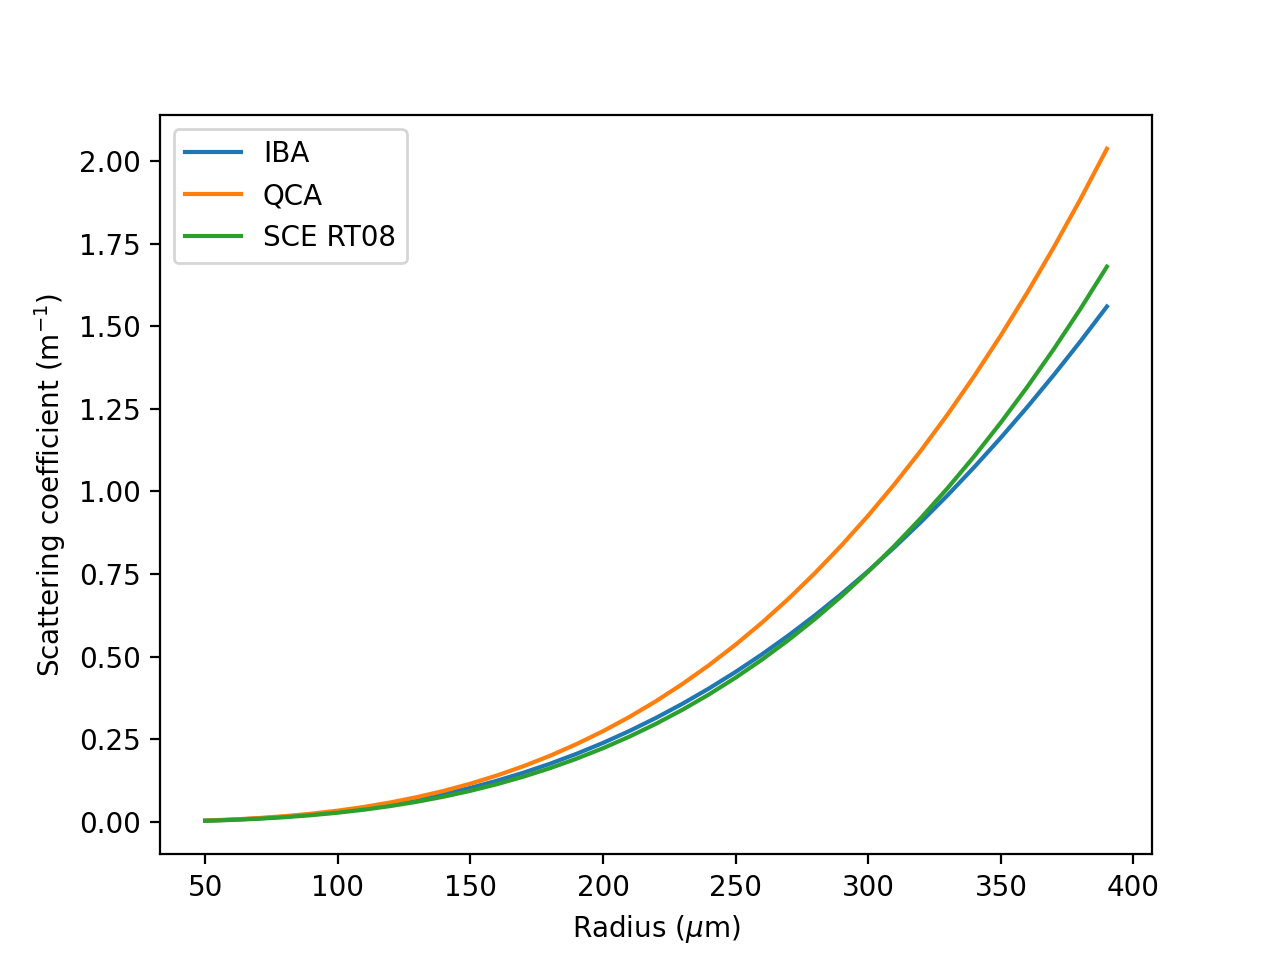

Text(0, 0.5, 'Scattering coefficient (m$^{-1}$)')

In [13]:
plt.figure()
plt.plot(radius_list*1e6, ks_iba, label="IBA")
plt.plot(radius_list*1e6, ks_qca, label="QCA")
plt.plot(radius_list*1e6, ks_sce, label="SCE RT08")

plt.legend()
plt.xlabel("Radius ($\mu$m)")
plt.ylabel("Scattering coefficient (m$^{-1}$)")

## Continue exploring: 
    
- Make a similar comparison for the EXP snowpack as a function of correlation length
- Explore the different behavior of the scattering coefficient as a function of density
- Get rid of the albedo warning by using QCA-CP instead of QCA. 